# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 555


In [3]:
#cities

In [4]:
city_test = cities[0:10]
city_test

['kone',
 'waitangi',
 "governor's harbour",
 'labytnangi',
 'palu',
 'aasiaat',
 'tazovsky',
 'alofi',
 'san juan de miraflores',
 'alice springs']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
from pprint import pprint

url = "https://api.openweathermap.org/data/2.5/weather?"
weather_api_key
units= "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(city_test):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:


    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Convert city_unix_date to day
        # city_date = pd.to_datetime(city_unix_date, unit = 'M')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kone
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | governor's harbour
City not found. Skipping...
Processing Record 4 of Set 1 | labytnangi
Processing Record 5 of Set 1 | palu
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | san juan de miraflores
Processing Record 10 of Set 1 | alice springs
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          9
Lat           9
Lng           9
Max Temp      9
Humidity      9
Cloudiness    9
Wind Speed    9
Country       9
Date          9
dtype: int64

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kone,-21.0595,164.8658,30.53,70,99,3.42,NC,1707091330
1,waitangi,-43.9535,-176.5597,16.35,79,20,5.42,NZ,1707091334
2,labytnangi,66.6572,66.4183,-18.70,98,99,2.41,RU,1707091336
3,palu,-0.8917,119.8707,25.92,92,100,0.38,ID,1707091336
4,aasiaat,68.7098,-52.8699,-31.61,89,30,2.20,GL,1707091337
5,tazovsky,67.4667,78.7000,-14.91,96,100,3.36,RU,1707091338
6,alofi,-19.0595,-169.9187,29.94,74,74,7.20,NU,1707091339
7,san juan de miraflores,-12.1629,-76.9635,27.87,68,57,2.45,PE,1707091339
8,alice springs,-23.7000,133.8833,36.23,21,20,7.72,AU,1707091051


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kone,-21.0595,164.8658,30.53,70,99,3.42,NC,1707091330
1,waitangi,-43.9535,-176.5597,16.35,79,20,5.42,NZ,1707091334
2,labytnangi,66.6572,66.4183,-18.70,98,99,2.41,RU,1707091336
3,palu,-0.8917,119.8707,25.92,92,100,0.38,ID,1707091336
4,aasiaat,68.7098,-52.8699,-31.61,89,30,2.20,GL,1707091337
5,tazovsky,67.4667,78.7000,-14.91,96,100,3.36,RU,1707091338
6,alofi,-19.0595,-169.9187,29.94,74,74,7.20,NU,1707091339
7,san juan de miraflores,-12.1629,-76.9635,27.87,68,57,2.45,PE,1707091339
8,alice springs,-23.7000,133.8833,36.23,21,20,7.72,AU,1707091051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

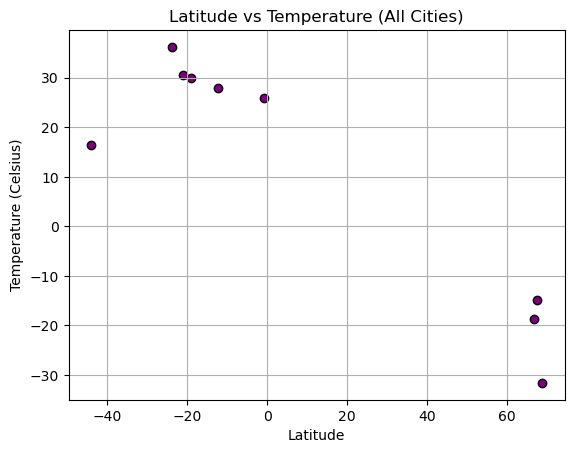

In [10]:
# Build scatter plot for latitude vs. temperature

# Define the x and y axes and values.
lat_v_temp_x = city_data_df["Lat"]
lat_v_temp_y = city_data_df["Max Temp"]

# Incorporate the other graph properties
# Axes labels, put grid in background, purple dots
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs Temperature (All Cities)")
plt.grid(True)
plt.scatter(lat_v_temp_x,lat_v_temp_y, color = "purple", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig1_LatTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

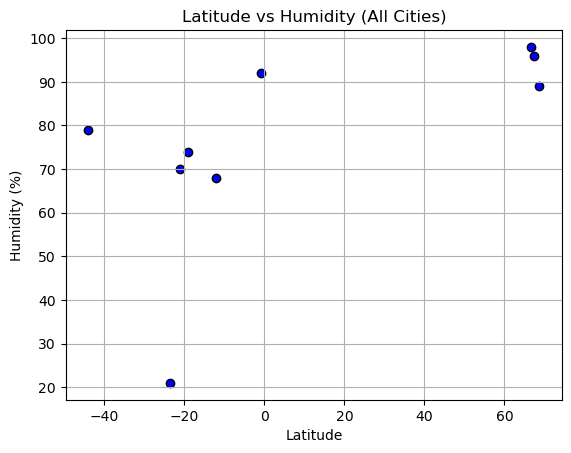

In [11]:
# Build the scatter plots for latitude vs. humidity

# Define x and y axes and values.
lat_v_hum_x = city_data_df["Lat"]
lat_v_hum_y = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (All Cities)")
plt.scatter(lat_v_hum_x,lat_v_hum_y,color="blue", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig2_LatHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

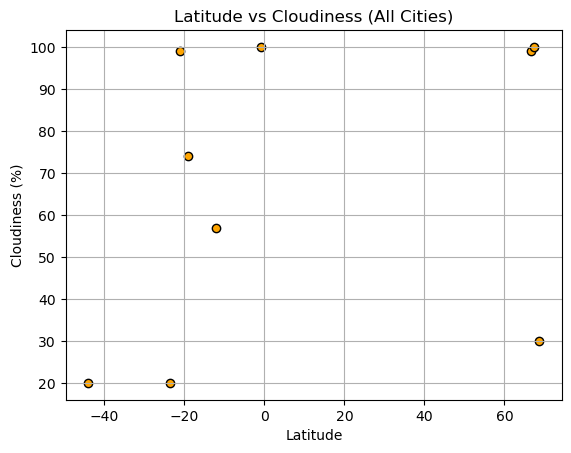

In [12]:
# Build the scatter plots for latitude vs. cloudiness

# Define x and y axes and values.
lat_v_cloud_x = city_data_df["Lat"]
lat_v_cloud_y = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (All Cities)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat_v_cloud_x,lat_v_cloud_y,color="orange", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig3_LatCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

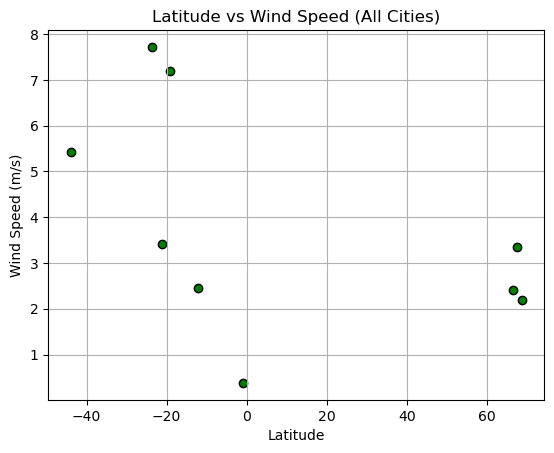

In [13]:
# Build the scatter plots for latitude vs. wind speed

# Define the x and y axes and values.
lat_v_wind_x = city_data_df["Lat"]
lat_v_wind_y = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (All Cities)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat_v_wind_x,lat_v_wind_y,color="green", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig4_LatWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values*slope + intercept

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi_df)

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,labytnangi,66.6572,66.4183,-18.70,98,99,2.41,RU,1707091336
4,aasiaat,68.7098,-52.8699,-31.61,89,30,2.20,GL,1707091337
5,tazovsky,67.4667,78.7000,-14.91,96,100,3.36,RU,1707091338


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df=pd.DataFrame(southern_hemi_df)

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kone,-21.0595,164.8658,30.53,70,99,3.42,NC,1707091330
1,waitangi,-43.9535,-176.5597,16.35,79,20,5.42,NZ,1707091334
3,palu,-0.8917,119.8707,25.92,92,100,0.38,ID,1707091336
6,alofi,-19.0595,-169.9187,29.94,74,74,7.20,NU,1707091339
7,san juan de miraflores,-12.1629,-76.9635,27.87,68,57,2.45,PE,1707091339
8,alice springs,-23.7000,133.8833,36.23,21,20,7.72,AU,1707091051


###  Temperature vs. Latitude Linear Regression Plot

City_ID
2   -15.166701
4   -29.309135
5   -20.744164
Name: Lat, dtype: float64
y = -6.89x + 444.1
The r-value is: 0.6620146852760987


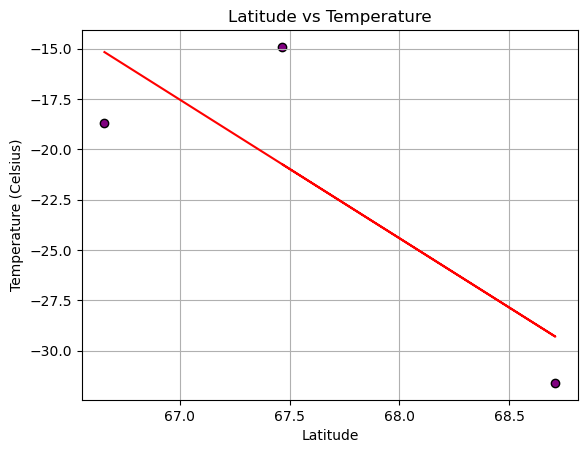

In [18]:
# Linear regression on Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Max Temp"]

# Linear regression on Lat vs Temp
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs temp, with the linear regression
plt.scatter(x_values, y_values_temp, color="purple", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)
plt.title("Latitude vs Temperature")
plt.annotate(line_eq,(5,-5),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
0    27.619028
1    22.958035
3    31.724993
6    28.026208
7    29.430288
8    27.081448
Name: Lat, dtype: float64
y = 0.2x + 31.91
The r-value is: 0.1933875603446459


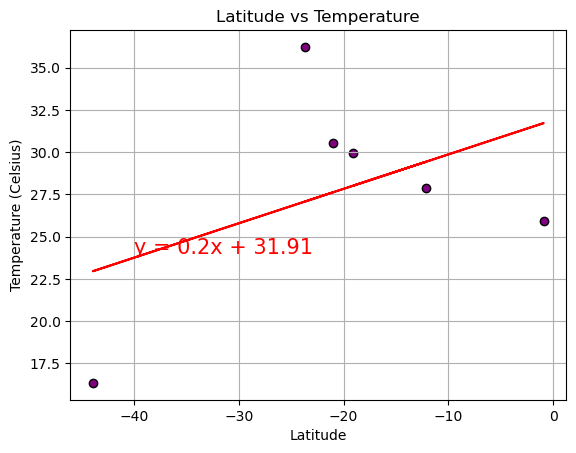

In [19]:
# Linear regression on Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Max Temp"]

# Linear regression on Lat vs Temp
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs temp, with the linear regression
plt.scatter(x_values, y_values_temp, color="purple", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)
plt.title("Latitude vs Temperature")
plt.annotate(line_eq,(-40,24),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

City_ID
2    98.616399
4    89.401396
5    94.982206
Name: Lat, dtype: float64
y = -4.49x + 397.87
The r-value is: 0.964694668447074


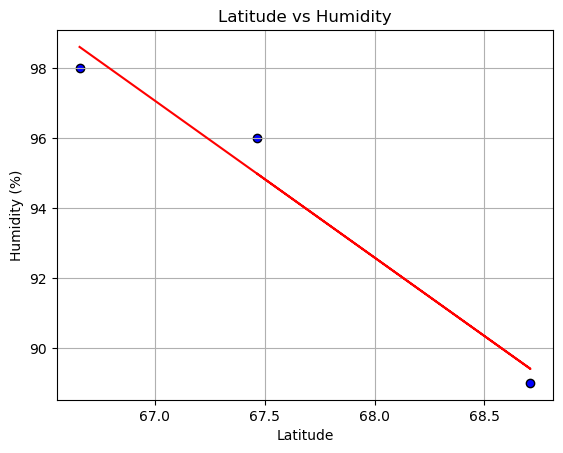

In [20]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Humidity"]

# Linear regression on Lat vs Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs humidity, with the linear regression
plt.scatter(x_values, y_values_temp, color="blue", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(10,65),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
0    66.995861
1    58.612967
3    74.380526
6    67.728183
7    70.253450
8    66.029012
Name: Lat, dtype: float64
y = 0.37x + 74.71
The r-value is: 0.04627604834748587


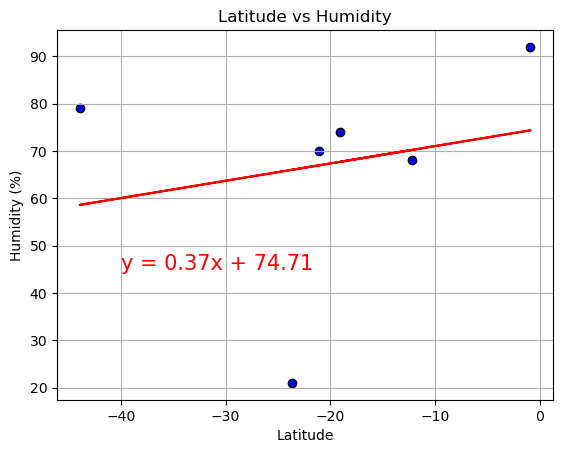

In [21]:
# Southern Hemisphere
# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Humidity"]

# Linear regression on Lat vs Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs humidity, with the linear regression
plt.scatter(x_values, y_values_temp, color="blue", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.title("Latitude vs Humidity")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
2    110.223622
4     37.308762
5     81.467616
Name: Lat, dtype: float64
y = -35.52x + 2478.1
The r-value is: 0.8376618798966222


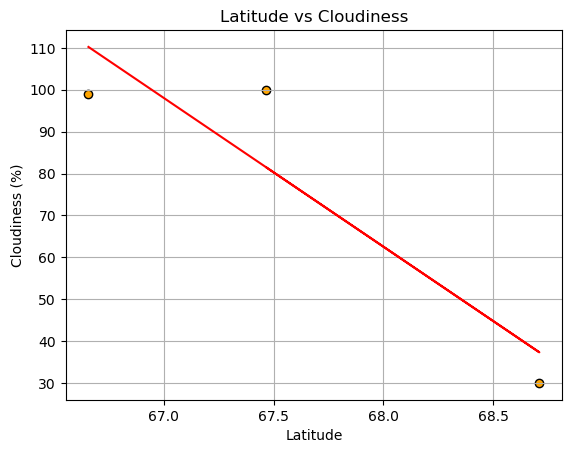

In [22]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Cloudiness"]

# Linear regression on Lat vs Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs cloudiness, with the linear regression
plt.scatter(x_values, y_values_temp, color="orange", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
0    60.015349
1    18.996242
3    96.149933
6    63.598743
7    75.955359
8    55.284374
Name: Lat, dtype: float64
y = 1.79x + 97.75
The r-value is: 0.5010069075606841


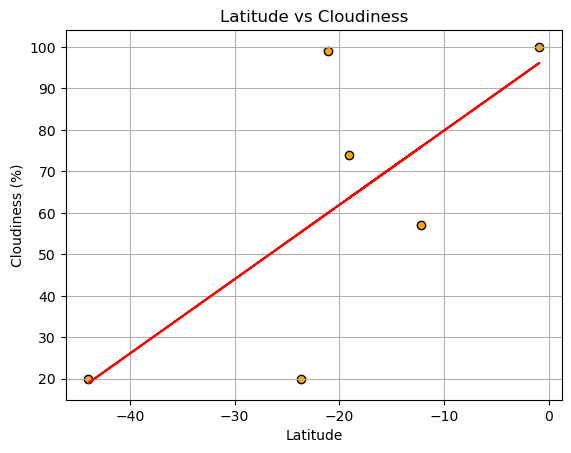

In [23]:
# Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Cloudiness"]

# Linear regression on Lat vs Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs cloudiness, with the linear regression
plt.scatter(x_values, y_values_temp, color="orange", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.title("Latitude vs Cloudiness")
plt.annotate(line_eq,(-50,53),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
2    2.820887
4    2.467567
5    2.681546
Name: Lat, dtype: float64
y = -0.17x + 14.29
The r-value is: 0.08290613571684784


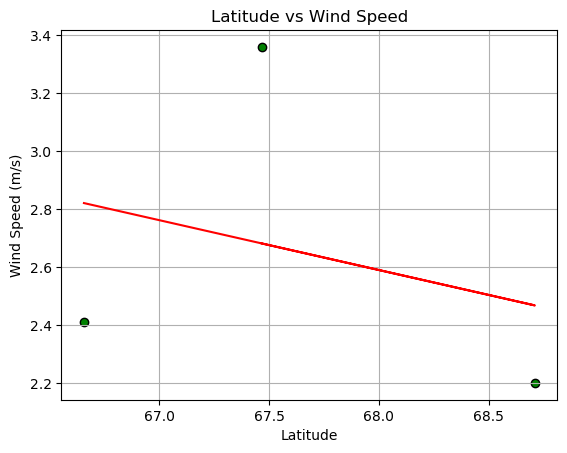

In [24]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Wind Speed"]

# Linear regression on Lat vs Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs wind speed, with the linear regression
plt.scatter(x_values, y_values_temp, color="green", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.annotate(line_eq,(10,2.5),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

City_ID
0    4.545175
1    7.364757
3    2.061347
6    4.298859
7    3.449487
8    4.870374
Name: Lat, dtype: float64
y = -0.12x + 1.95
The r-value is: 0.37748811234888996


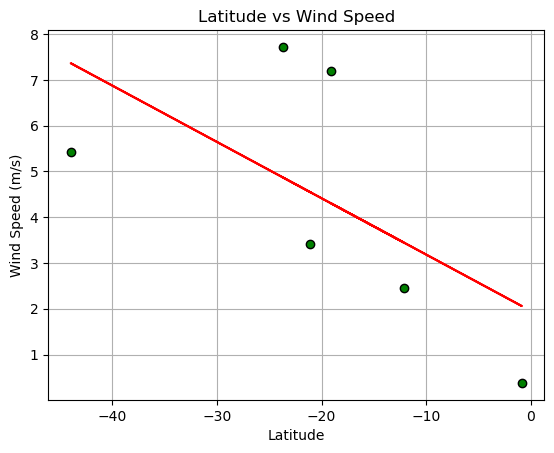

In [25]:
# Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values_temp = southern_hemi_df["Wind Speed"]

# Linear regression on Lat vs Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_temp)

# Calculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create scatter plot of lat vs wind speed, with the linear regression
plt.scatter(x_values, y_values_temp, color="green", edgecolor="black")
plt.plot(x_values,regress_values, "r-")

# Label and annotate plot components and line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.title("Latitude vs Wind Speed")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE